<a href="https://colab.research.google.com/github/K-Kamonrat/DPDM/blob/master/pandas_and_data_preprocessing101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

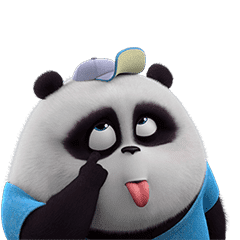

In [1]:
import pandas

In [2]:
import pandas as pd

In [3]:

from google.colab import drive

In [29]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [30]:
import os
path =  '/content/drive/My Drive/DWDM_material'

In [34]:
search_click = os.path.join(path, 'search_click.csv')
w_restaurant = os.path.join(path, 'w_restaurant.csv')

In [35]:
search_click_df = pd.read_csv(search_click)
w_restaurant_df = pd.read_csv(w_restaurant)

In [37]:
search_click_df.head()


,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


In [38]:
w_restaurant_df.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [39]:
search_click_df.shape #.shape เอาไว้เช็ครูปร่างของตาราง จะแสดงค่า (dataจำนวนแถว , featureจำนวนคอลัม)

(1048575, 6)

In [40]:
w_restaurant_df.shape

(246847, 32)

In [41]:
search_click_df.shape[0]

1048575

#0.Point to data in the table

##normal index

In [42]:
search_click_df['search_id'] #ใส่ชื่อคอลัมม์เลย

0          5c004472-5ecc-4159-9698-9f329b8e26e1
1          5f34eca0-c04e-4c10-b600-54aa447dbd8e
2          8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3          1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4          6bc75e0d-fc65-471e-9926-ff6be6708639
                           ...                 
1048570    99aab616-6fc5-4fbf-994b-4aebee7bb360
1048571    d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a
1048572    4c1de7fe-300e-41aa-9d01-914344fc3753
1048573    2ec0ddec-e450-4b98-9779-42b77aa7eda5
1048574    5741d9cf-b9f1-441d-aa83-d2b0179bf874
Name: search_id, Length: 1048575, dtype: object

In [44]:
search_click_df['search_id'][0]  #ด้านแนวตั้งใช้ชื่อตาราง ด้านแนวนอนใช้ตะเลขระบะตำแหน่งของdata

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [45]:
w_restaurant_df[['name','city_name','weighted_average_rating']]

,name,city_name,weighted_average_rating
0,นครินทร์ทันตกรรม,Samut Songkhram,5.000000
1,Corner House,Bangkok Metropolitan Region,2.000000
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,4.000000
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,0.000000
4,Buono Caffe,Bangkok Metropolitan Region,3.738462
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,3.663522
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,0.000000
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,4.000000
246845,Mom Made,Nakhon Si Thammarat,5.000000


##.iloc
* มอง data เป็น matrix

In [46]:
search_click_df.iloc[0,1]

'5c004472-5ecc-4159-9698-9f329b8e26e1'

In [48]:
search_click_df.iloc[:10,:2] #matrix sclicing

,click_timestamp,search_id
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639
5,48:16.7,92ea02ba-2c89-4efd-973c-e23526c531de
6,39:18.4,79d61918-fb3e-4181-99b6-7a7abddfcdb1
7,33:39.0,7f8b2b57-dea1-4fe1-84c8-5a7d63750e47
8,07:48.3,3d9217bb-3eae-42b5-8cf3-a756efae2cfa
9,41:25.4,a2cb0d41-6e1f-4169-9140-cb671fbb41dc


#Missing value

In [50]:
search_click_df.isnull() #.isnull เอาไว้เช็คว่ามี missing value รึป่าว >> True หมายว่าว่า ช่องนั้นเป็น missing value ถ้าไม่ใช่ จะขึ้นว่า False

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1048570,False,False,False,False,False,False
1048571,False,False,False,False,False,False
1048572,False,False,False,False,False,False
1048573,False,False,False,False,False,False


In [52]:
search_click_df.isnull().any()  #.any คือการสรุปรวมความจริงทั้งหมดในฝั่งคอลัมม์   เอาข้อมูลในแต่ละข้อลัมล์มา or(logic) กันทั้งหมด

click_timestamp     False
search_id            True
business_id          True
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

In [54]:
search_click_df.isnull().any().any() #เอาความจริงที่เหลืออยู่คอลัมม์เดียวมา or กันทั้งหมด จะได้รู้ความจริงทั้งตาราง

True

In [53]:
search_click_df.isnull().all() #.all คือการสรุปรวมความจริงทั้งหมดในฝั่งคอลัมม์   เอาข้อมูลในแต่ละข้อลัมล์มา and(logic) กันทั้งหมด

click_timestamp     False
search_id           False
business_id         False
display_position    False
time_diff_nanos     False
ads                 False
dtype: bool

#Handdle Missing value 1

* delete ข้อมูลนั้นไปเลย

In [55]:
search_click_df_nm =search_click_df.dropna()

In [56]:
search_click_df_nm.isnull().any().any()

False

In [57]:
print(search_click_df.shape)
print(search_click_df_nm.shape)

(1048575, 6)
(1048206, 6)


In [58]:
print(search_click_df.shape[0]-search_click_df_nm.shape[0]) #หาว่าข้อมูลMissingที่ลบไปมีกี่ตัว

369


#Exercise1 ตรวจสอบว่ากานรลบข้อมูล missing อกจากตาราง w_restarant จะทำให้ข้อมูลลดลงกี่ %

In [59]:
w_restaurant_df_nm = w_restaurant_df.dropna()

In [60]:
w_restaurant_df_nm.isnull().any().any()

False

In [61]:
print(w_restaurant_df.shape)
print(w_restaurant_df_nm.shape)

(246847, 32)
(4, 32)


In [65]:
 print(w_restaurant_df.shape[0]-w_restaurant_df_nm.shape[0]) #จำนวนข้อมูลที่หายไป

246843


In [68]:
((w_restaurant_df.shape[0]-w_restaurant_df_nm.shape[0])/w_restaurant_df.shape[0])*100 #ของจำนวนข้อมูลที่หายไป

99.99837956304918

##Method 1.5 

* dropna หรือ ลบ เฉพาะข้อมูลที่เราต้องการ เช่น อยากรู้ราคาเฉลี่ยของร้านค้าเป็นเท่าไหร่ ก็เลือกเฉพาะคอลัมม์ที่เกี่ยวข้อง

In [69]:
w_restaurant_df_nm.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                    False
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains           False
number_of_bookmarks        False
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                False
avg_price                  False
parking                    False
credit_card_accepted       False
good_for_groups            False
good_for_kids              False
bookable                   False
best_of_wongnai            False
wifi                       False
number_of_seats            False
music_venue                False
hotel_restaurant           False
pet_friend

In [75]:
w_restaurant_df.dropna(subset=['id','name','avg_price']).shape

(4572, 32)

In [72]:
w_rest_dropped_avgprice=w_restaurant_df.dropna(subset=['id','name','avg_price'])

In [74]:
w_rest_dropped_avgprice.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
11,27,แพอาหารธาราบุรี,1,0,Kanchanaburi,71000,w4qzbb4,0,3.568245,NaN,107.0,34,3,22277,26,0,0,Thai,3.0,375.0,3.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
67,123,เล็กกุ้งเผา,1,0,Bangkok Metropolitan Region,10310,w4rw9mc,0,3.685552,NaN,272.0,29,7,28697,26,0,15,Thai,3.0,375.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,175,ใต้ต้นมะม่วง,1,0,Phuket,83000,w1muz5d,0,3.857143,NaN,17.0,15,2,3278,6,0,3,Thai,1.0,50.0,1.0,0.0,1.0,1.0,0.0,NaN,0.0,2.0,NaN,NaN,NaN,NaN
129,262,Oniku Shabushabu & Yakiniku,1,0,Surat Thani,84000,w1weuxg,0,3.633588,NaN,40.0,19,2,10349,7,0,11,Sukiyaki/Shabu,3.0,375.0,3.0,1.0,1.0,1.0,1.0,NaN,1.0,5.0,NaN,0.0,NaN,1.0
134,271,Cafe Cha,1,0,Bangkok Metropolitan Region,10300,w4rqrhf,0,4.094527,NaN,251.0,12,0,17775,11,0,7,Café/Coffee Shop,4.0,175.0,3.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [76]:
w_restaurant_df.dropna(subset=['id','name','avg_price'])['avg_price'].mean()

327.44728783902013

##Method 2 (Replace with reasonalable value)

### we are replacing missing value in the number of chains with 0
* number of chain คืออะไร ไปเปิดดูใน matadata == จำนวนสาขาของร้าน

In [78]:
w_restaurant_df[['number_of_chains']] = w_restaurant_df[['number_of_chains']].fillna(0)

In [79]:
w_restaurant_df.isnull().any()

id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains           False
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_restaurant            True
pet_friend

## Method 2.1 (replace with unknown value) 
* ใส่ค่าที่คิดว่าคนไม่น่ากรอกสิ่งเหล่านี้ลงไป เพื่อไม่ให้มี missing แต่ไม่ทำให้ค่าทางสถิติของข้อมูลเปลี่ยนไป

##Method 2.2 (replace with mean)

## Method 3 (replace with mean)

In [81]:
new_table = w_restaurant_df[['name','city_name','avg_price']]
new_table

,name,city_name,avg_price
0,นครินทร์ทันตกรรม,Samut Songkhram,NaN
1,Corner House,Bangkok Metropolitan Region,NaN
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,NaN
246845,Mom Made,Nakhon Si Thammarat,NaN


#[PD] Select data

In [82]:
selected_list = new_table['city_name']=='Bangkok Metropolitan Region'
selected_list 

0         False
1          True
2         False
3          True
4          True
          ...  
246842     True
246843     True
246844     True
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

In [83]:
new_table[selected_list].head()

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN


In [84]:
new_table[new_table['city_name']=='Bangkok Metropolitan Region'].dropna()['avg_price'].mean()

392.5854715094968

1.สร้างตารางใหม่ที่เลือกมาเฉพาะใน กทม.

In [85]:
phuket_table = new_table['city_name']=='Phuket'

In [86]:
phuket_table.dropna()

0         False
1         False
2         False
3         False
4         False
          ...  
246842    False
246843    False
246844    False
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

In [87]:
phuket_table.dropna().any()

True

In [88]:
phuket_table.dropna()

KeyError: ignored